<a href="https://colab.research.google.com/github/ShamEgo/ANNforYaleDatabase/blob/master/ANNforYale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive/assignment"

/content/gdrive/My Drive/assignment


In [ ]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.io
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
mat = scipy.io.loadmat('Yale_32x32.mat')

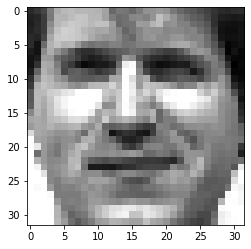

In [ ]:
fea = np.array(mat["fea"])
gnd = np.array(mat["gnd"])

plt.imshow((fea[10].reshape(32,32)).T)

In [ ]:
print(len(gnd))

165


In [ ]:
#total X data
X=fea.T/255

#total Y data
Y=np.zeros((15,165))
for i in range(0,15):
  for j in range( 11*i  , (11*i)+11 ):
    Y[i][j]=1


In [ ]:
training_samples = 50
testing_samples = 20

In [ ]:
train_x=np.zeros([1024,0])
train_y=np.zeros([15,0])

test_x=np.zeros([1024,0])
test_y=np.zeros([15,0])

for x in range(training_samples):
  i=random.randint(0,164)
  train_x=np.concatenate((train_x, X[:,i].reshape(1024,1)), axis=1)
  train_y=np.concatenate((train_y, Y[:,i].reshape(15,1)), axis=1)

for y in range(testing_samples):
  i=random.randint(0,164)
  test_x=np.concatenate((test_x, X[:,i].reshape(1024,1)), axis=1)
  test_y=np.concatenate((test_y, Y[:,i].reshape(15,1)), axis=1)

print("train_x's shape: " + str(train_x.shape))
print ("train_y's shape: " + str(train_y.shape))  
print("test_x's shape: " + str(test_x.shape))
print ("test_y's shape: " + str(test_y.shape)) 

train_x's shape: (1024, 50)
train_y's shape: (15, 50)
test_x's shape: (1024, 20)
test_y's shape: (15, 20)


In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

       # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
layers_dims = [1024,512, 15] #  4-layer model

Cost after iteration 0: 10.929854
Cost after iteration 100: 2.885394
Cost after iteration 200: 2.208178
Cost after iteration 300: 1.685215
Cost after iteration 400: 1.299756
Cost after iteration 500: 1.015775
Cost after iteration 600: 0.806357
Cost after iteration 700: 0.650798
Cost after iteration 800: 0.533690
Cost after iteration 900: 0.444512


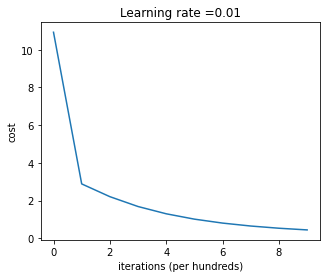

In [ ]:
#Train NN
parameters = L_layer_model(train_x, train_y, layers_dims,learning_rate = 0.01, num_iterations = 1000, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9373333333333334


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9366666666666666
